In [1]:
#pandas 1.5.3
#scikit-learn  1.2.2
#seaborn 0.12.2
#xgboost 1.7.4


import pandas as pd
from sklearn.model_selection import train_test_split
import os
import seaborn as sns

In [2]:
os.chdir('...')
data=pd.read_csv("MODZ_signatures_A549_10um_24h_sig_id_1243_20231013.csv",index_col="pert_id_conc.")
X=data.iloc[:,5:12333]
y=data.iloc[:,0:5]
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2,
                                                 stratify=y.iloc[:,4],
                                                 shuffle=True, 
                                                 random_state=123)
data_for_FS=pd.concat([Y_train,X_train],axis=1)

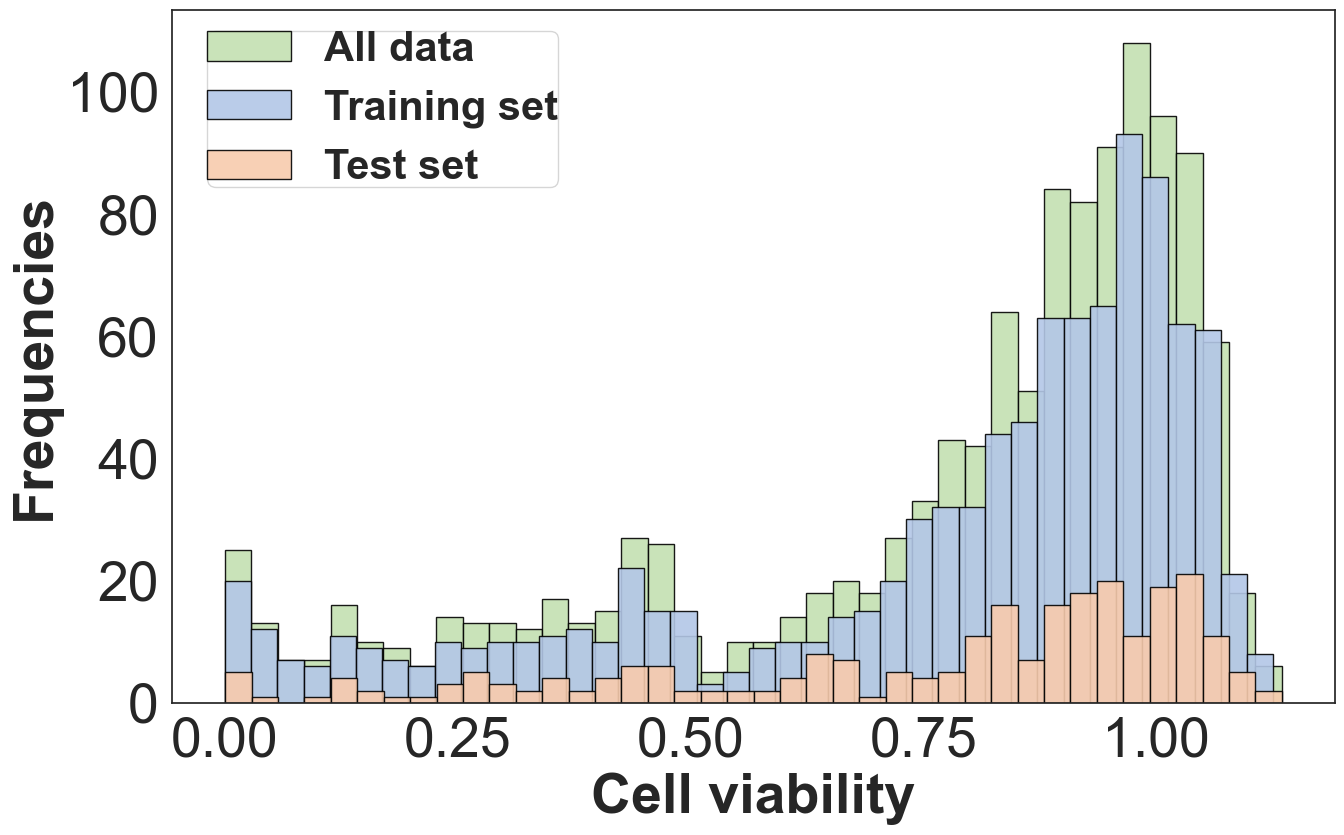

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
sns.set(style='white')
figsize = 15,9
figure, ax = plt.subplots(figsize=figsize)
matplotlib.rcParams['font.sans-serif']=['Arial']   
matplotlib.rcParams['axes.unicode_minus']=False     
plt.tick_params(labelsize=40)
font2 = {'family' : 'Arial',
'weight' : 'bold',
'size'   : 40,
}
plt.xlabel('round',font2)
plt.ylabel('value',font2)
bar_width = 0.6
index1 = 1
plt.hist(data["Cell viability"], bins=40, stacked=True,facecolor="#c4e0b2", edgecolor="black", alpha=0.9,label='All data')
plt.hist(Y_train["Cell viability"], bins=40, facecolor="#b3c7e7", edgecolor="black", alpha=0.9,label='Training set')
plt.hist(Y_test["Cell viability"], bins=40,stacked=True,facecolor="#f8cbad", edgecolor="black", alpha=0.9,label='Test set')
plt.xlabel("Cell viability")
plt.ylabel("Frequencies")
font1 = {'family' : 'Arial',
'weight' : 'bold',
'size'   : 30,
}
plt.legend(loc=1,borderpad=0,bbox_to_anchor=(0.35,1),prop=font1)  


plt.savefig('The distribution of cell vibility data-20231013.svg', format='svg',bbox_inches="tight")